# Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('headbrain.csv')
df.shape

(237, 4)

In [3]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
x=df['Head Size(cm^3)'].values # gives an array
y=df['Brain Weight(grams)'].values

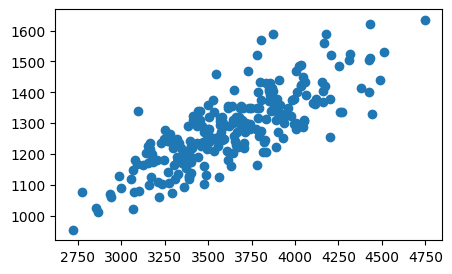

In [19]:
plt.figure(figsize=(5,3)) #size in inches
plt.scatter(x,y)
plt.show()

In [11]:
x_mean=np.mean(x)
y_mean=np.mean(y)

In [12]:
num=0;
dem=0;
n=len(x)

for i in range(n):
    num += (y[i]-y_mean)*(x[i]-x_mean)
    dem+=(x[i]-x_mean)**2

slope=num/dem
intercept=y_mean-slope*x_mean
print("Slope : ",slope)
print("Intercept : ",intercept)

Slope :  0.26342933948939945
Intercept :  325.57342104944223


In [13]:
y_pred=[]
for i in range(n):
    pred=slope*x[i] +intercept
    y_pred.append(int(pred))

In [14]:
print("Predictions : ",y_pred[:5])
print("Actual : ",y[:5])

Predictions :  [1514, 1310, 1448, 1320, 1425]
Actual :  [1530 1297 1335 1282 1590]


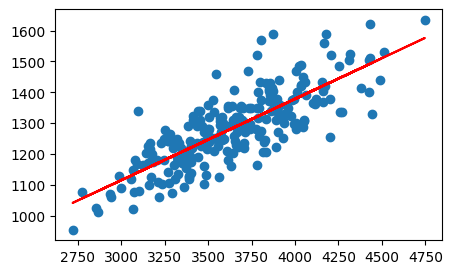

In [18]:
plt.figure(figsize=(5,3)) #size in inches
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.show()

In [20]:
err=0
for i in range(n):
    err+=(y[i]-y_pred[i])**2
mse=err/n
print("MSE: ",mse)
print("RMSE: ",np.sqrt(mse))

MSE:  5202.9029535864975
RMSE:  72.13115106239812


# Gradient Descent

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
x=np.reshape(x,(-1,1))
y=np.reshape(y,(-1,1))

# scaling the data between 0-1 
minmax=MinMaxScaler()
# fit transform takes 2-D input
scaled_x = minmax.fit_transform(x)
scaled_y = minmax.fit_transform(y)

In [41]:
def gradient_descent(epochs,alpha):
    slope,inter=  0,0
    for i in range(epochs):
        y_pred = scaled_x * slope + inter
        loss = y_pred-scaled_y
        gradSlope = (2/n) * np.dot(loss.T,scaled_x)
        gradInter = (2/n) * np.sum(loss)
        slope = slope - gradSlope * alpha
        inter = inter - gradInter * alpha
    return slope,inter

In [51]:
epochs=1000 # no of iterations
alpha=0.1   # learning rate
slope,inter=gradient_descent(epochs,alpha)
print("Slope: ",slope,"Inter: ",inter)

Slope:  [[0.78245288]] Inter:  0.12938680772492853


In [49]:
y_pred=[]
for i in range(n):
    pred = slope[0][0] * scaled_x[i] + inter
    y_pred.append(pred)

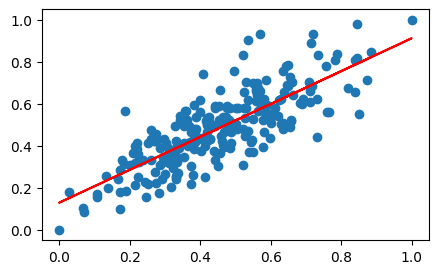

In [50]:
plt.figure(figsize=(5,3)) #size in inches
plt.scatter(scaled_x,scaled_y)
plt.plot(scaled_x,y_pred,color='red')
plt.show()